In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv('sign_mnist_train.csv')
df_test=pd.read_csv('sign_mnist_test.csv')
y_train=df_train['label'].values
y_test=df_test['label'].values
df_train.drop('label',axis=1,inplace=True)
df_test.drop('label',axis=1,inplace=True)
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [3]:
x_train=df_train.values
x_test=df_test.values
unique_val = np.array(y_train)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [4]:
x_train=np.array(x_train.reshape(-1,28,28,1))
x_test=np.array(x_test.reshape(-1,28,28,1))

In [5]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
from sklearn.preprocessing import LabelBinarizer
lb_train= LabelBinarizer()
lb_test=LabelBinarizer()
y_train=lb_train.fit_transform(y_train)
y_test=lb_test.fit_transform(y_test)

In [7]:
print(y_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


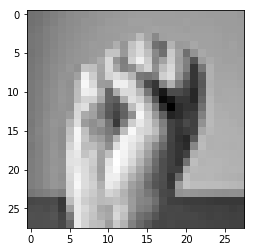

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10].reshape(28,28),cmap='gray')

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [12]:
batch_size = 128
num_classes = 24
epochs = 100


In [13]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [14]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [15]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 27455 samples, validate on 7172 samples
Epoch 1/100
27455/27455 [==============================] - 7s 262us/step - loss: 2.5675 - acc: 0.2091 - val_loss: 1.3706 - val_acc: 0.5710
Epoch 2/100
27455/27455 [==============================] - 4s 128us/step - loss: 1.1583 - acc: 0.6036 - val_loss: 0.7412 - val_acc: 0.7546s - loss: 1.4433 - acc
Epoch 3/100
27455/27455 [==============================] - 4s 128us/step - loss: 0.7274 - acc: 0.7483 - val_loss: 0.5387 - val_acc: 0.8077.7565 - a - ETA: 0s - loss: 0.7334 - acc: 0.7
Epoch 4/100
27455/27455 [==============================] - 4s 128us/step - loss: 0.5138 - acc: 0.8244 - val_loss: 0.3936 - val_acc: 0.8728
Epoch 5/100
27455/27455 [==============================] - 4s 128us/step - loss: 0.3764 - acc: 0.8711 - val_loss: 0.3196 - val_acc: 0.8957
Epoch 6/100
27455/27455 [==============================] - 4s 131us/step - loss: 0.2944 - acc: 0.9008 - val_loss: 0.2757 - val_acc: 0.9028
Epoch 7/100
27455/27455 [=========================

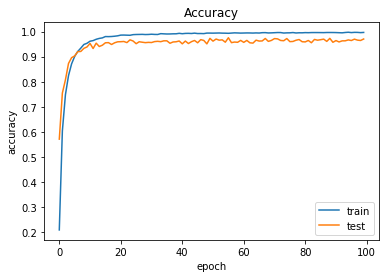

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [17]:
model.save('sign_language')

In [18]:
import cv2
from keras.preprocessing.image import img_to_array
alphabet=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba=model.predict(image)
    idx = np.argmax(proba)
    return alphabet[idx]

In [19]:
classify(x_train[3]*255)

'C'

In [20]:
print(y_train[3])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
